In [1]:
import scipy
import time
import math as m
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.special as sc

import sys
import os
myhost = os.uname()[1]

if myhost == "crt-desktop":
    home_folder = r"/media/crt/Linux/Programs"
elif myhost == "crt-ThinkPad-T490s":
    home_folder = r"/home/crt/Linux/Programs" 
else:
    home_folder = r"/home/lozej/Programs"

project_folder = home_folder + r"/QuantumBilliards/TrianglesBogomolny"
#home_folder = "/Users/draganlukman/Documents/CAMTP/LemonMarch2021"
library_folder = home_folder + "/QuantumBilliardsLibrary2/quantum_billiards"
data_folder = project_folder + "/Analysis/Data"
raw_data_folder = project_folder + "/RawData"
figure_folder = project_folder + "/Analysis/Figures"

sys.path.append(home_folder)
sys.path.append(library_folder)
sys.path.append(project_folder)
from pylab import *
%matplotlib inline

#import UnfoldedSpectrum as us
import UtilityFunctionsTriangle as uf
import SpectralStatistics as spec
from Classes import UnfoldedSpectrum as sp
from Models import GOE
from Models import Brody
from Models import Poisson
from Models import BerryRobnikBrody as BRB
from Models import BerryRobnik as BR

rc('text', usetex=True)
rc('font', size = 10)
rc('xtick', labelsize='medium')
rc('ytick', labelsize='medium')
rc('axes', labelsize='medium')
rc('legend', fontsize='small')
rc('figure', figsize=(8.6/2.54, 8.6/2.54*0.75))
rc('lines', linewidth=1.5)
rcParams["axes.formatter.limits"] = (-3,4) 

In [2]:

def spect_size(typ, kind):
    dn = int(2e6)
    if typ == "A":
        if kind == 3:
            dn = int(8e5)  
    elif typ == "C":
        if kind == 0:
            dn = int(1e6)
        if kind == 1:
            dn = int(1e6)
    else:
        dn = int(1e6)
        
    return dn

typ = "A"
kind = 0
gamma, chi, h, name = uf.triangle_parameters(typ, kind)


In [3]:
e0 = 10000
gamma, chi, h, name = uf.triangle_parameters(typ, kind)
E, ten = uf.load_unfolded(name, 0, spect_size(typ, kind) )
E = E[E>e0]
spect = sp.spectrum(E)
goe = GOE.Model()
brody= Brody.Model()
poiss = Poisson.Model()
br = BR.Model()
brb = BRB.Model()

In [4]:
stats = spec.spectral_statistics(spect, goe)

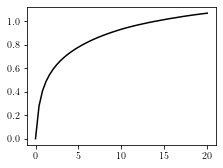

In [5]:
stats.plot_data("NV", s_max= 5, plot_kwargs = {'color':'k'})

None


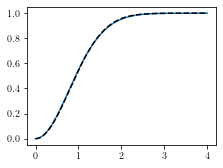

In [12]:
beta = stats.fit("W",
              plot_kwargs_model = {'color':'k', 'ls':'--'})


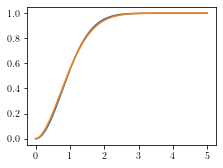

In [6]:
stats.plot_data("W", s_max= 5)
stats.plot_model("W", 0, 0.82, x_max= 5)

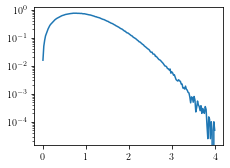

In [7]:
stats.plot_data("P",n =1, s_max= 4, log_y=True)

[6.25395430e-13 9.57445958e-01]


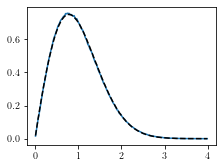

In [8]:
beta = stats.fit("P", 
              plot_kwargs_model = {'color':'k', 'ls':'--'})


[6.09359790e-11 9.48570994e-01]


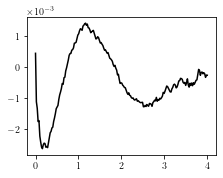

In [9]:
beta = stats.plot_difference("U", 
              plot_kwargs = {'color':'k', 'ls':'-'})

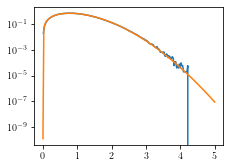

In [11]:
stats.plot_data("P", s_max= 5,log_y=True)
stats.plot_model("P", *beta, x_max= 5,log_y=True)